In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
import warnings
warnings.filterwarnings("ignore")

# Dataset importeren en opschonen

In [2]:
nutr = pd.read_csv('Datasets Foodboost/nutritions.csv')
nurt_pivot = nutr.pivot_table(values="value", index= nutr.recipe, columns="nutrition", aggfunc="sum")
nurt_pivot= nurt_pivot.fillna(0) 
nurt_pivot['eiwit'] = nurt_pivot['eiwit'].str[:-1]
nurt_pivot['energie'] = nurt_pivot['energie'].str[:-4]
nurt_pivot['koolhydraten'] = nurt_pivot['koolhydraten'].str[:-1]
nurt_pivot['natrium'] = nurt_pivot['natrium'].str[:-2]
nurt_pivot['vet'] = nurt_pivot['vet'].str[:-1]
nurt_pivot['vezels'] = nurt_pivot['vezels'].str[:-1]
nurt_pivot['waarvan verzadigd'] = nurt_pivot['waarvan verzadigd'].str[:-1]
nurt_pivot['waarvan suikers'] = nurt_pivot['waarvan suikers'].str[:-1]

nurt_pivot = nurt_pivot.iloc[:,:-2]
nurt_pivot = nurt_pivot.dropna()
nurt_pivot = nurt_pivot.astype(float)
nurt_pivot.head(3)

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels
recipe,,,,,,
Andijviestamppot met gebakken salami,25.0,630.0,36.0,1875.0,41.0,7.0
Bietensoep met selderijroom,3.0,160.0,11.0,1160.0,11.0,5.0
Libanese wraps met appel-koolsalade,21.0,440.0,45.0,440.0,18.0,9.0


# Dataset splitsen

In [3]:
train_Dataset = nurt_pivot[:-1000]
train_Dataset["trans_vet"] = np.sqrt(train_Dataset[["vet"]])
train_Dataset["trans_energie"] = np.sqrt(train_Dataset[["energie"]])
train_Dataset.head(3)

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,trans_vet,trans_energie
recipe,,,,,,,,
Andijviestamppot met gebakken salami,25.0,630.0,36.0,1875.0,41.0,7.0,6.403124,25.099801
Bietensoep met selderijroom,3.0,160.0,11.0,1160.0,11.0,5.0,3.316625,12.649111
Libanese wraps met appel-koolsalade,21.0,440.0,45.0,440.0,18.0,9.0,4.242641,20.976177


In [4]:
test_Dataset = nurt_pivot[-1000:]
#test_Dataset["trans_vet"] = np.sqrt(test_Dataset[["vet"]])
test_Dataset["trans_energie"] = np.sqrt(test_Dataset[["energie"]])
test_Dataset["y_pred"] = np.nan
test_Dataset.head(3)

nutrition,eiwit,energie,koolhydraten,natrium,vet,vezels,trans_energie,y_pred
recipe,,,,,,,,
Tompouce van kabeljauw,19.0,320.0,1.0,810.0,24.0,0.0,17.888544,NaN
Tong met gebruinde boter &amp; haricots verts,21.0,540.0,25.0,335.0,38.0,6.0,23.237900,NaN
Tonijn-broccoliquiche met tomaatjes en oude kaas,40.0,720.0,36.0,880.0,45.0,6.0,26.832816,NaN


## Correlatie bepalen van vet met de andere kolommen

In [5]:
nutri_dingen = ["vezels", "natrium","koolhydraten","energie","eiwit"]
#tags_dingen = ["wat eten we vandaag","oven","lactosevrij","glutenvrij" ]
for i in nutri_dingen:
    print(i, train_Dataset["vet"].corr(train_Dataset[i]))

vezels 0.1849774398266035
natrium 0.3032351979395765
koolhydraten 0.30019287232827613
energie 0.8217950106306807
eiwit 0.5199205975990643


In [6]:
# alleen de juiste kolommen selecteren
train_Dataset = train_Dataset[["vet","energie"]]
test_Dataset = test_Dataset[["vet","energie"]]

# Uitschieters trainset bepalen

## Boxplot energie

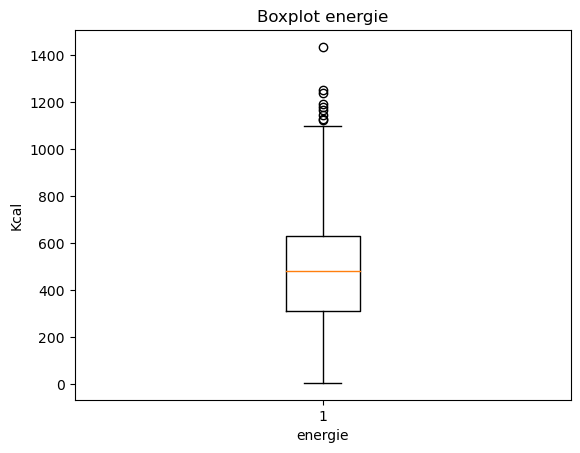

In [28]:
plt.boxplot(train_Dataset[["energie"]])
plt.title('Boxplot energie')
plt.xlabel('energie')
plt.ylabel('Kcal')
plt.show()

In [8]:
train_Dataset[["energie"]].sort_values("energie",ascending=False).head(3)

nutrition,energie
recipe,
Roggebrood met noten en bessen,3320.0
Adjaruli khachapuri (Georgische kaas-eibrood),1435.0
Beef rendang met basmatirijst,1250.0


# Boxplot vet

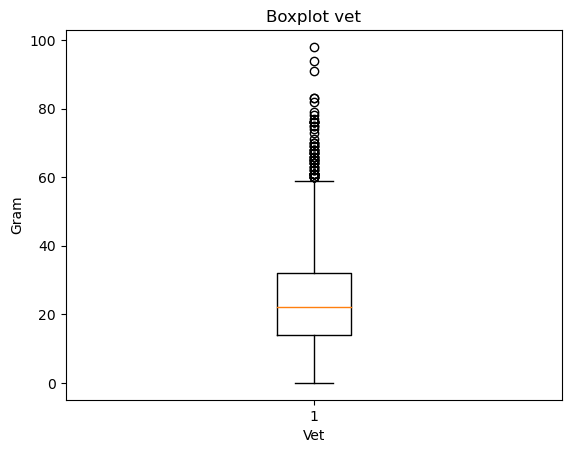

In [29]:
plt.boxplot(train_Dataset[["vet"]])
plt.title('Boxplot vet')
plt.xlabel('Vet')
plt.ylabel('Gram')
plt.show()

In [10]:
train_Dataset[["vet"]].sort_values("vet",ascending=False).head(5)

nutrition,vet
recipe,
Roggebrood met noten en bessen,112.0
"Eend met 5 spices, sinaasappel en gember met pannenkoekjes",98.0
Texas style shortribs met gepofte zoete aardappel van Jord Althuizen,94.0
Rendang Padang van Vanja van der Leeden,91.0
Grand dessert,83.0


# De uitschieter uit de trainset halen

In [11]:
train_Dataset.drop("Roggebrood met noten en bessen",axis=0, inplace=True)
train_Dataset.head(3)

nutrition,vet,energie
recipe,,
Andijviestamppot met gebakken salami,41.0,630.0
Bietensoep met selderijroom,11.0,160.0
Libanese wraps met appel-koolsalade,18.0,440.0


# Histogram

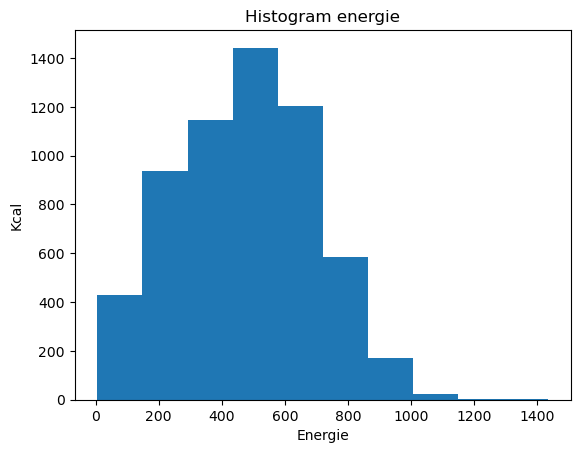

In [30]:
plt.hist(train_Dataset[["energie"]])
plt.title('Histogram energie')
plt.xlabel('Energie')
plt.ylabel('Kcal')
plt.show()

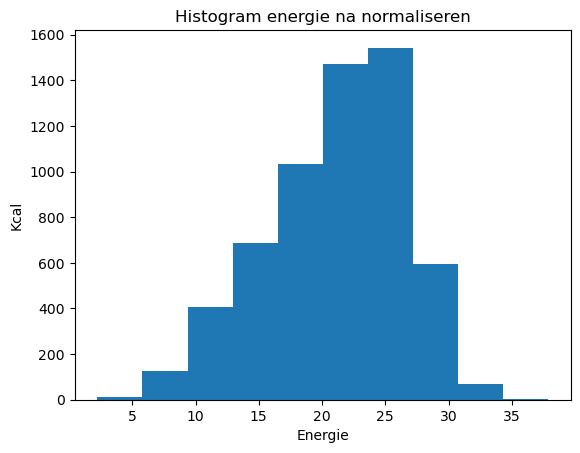

In [31]:
trans_energie = np.sqrt(train_Dataset[["energie"]])
plt.hist(trans_energie)
plt.title('Histogram energie na normaliseren')
plt.xlabel('Energie')
plt.ylabel('Kcal')
plt.show()

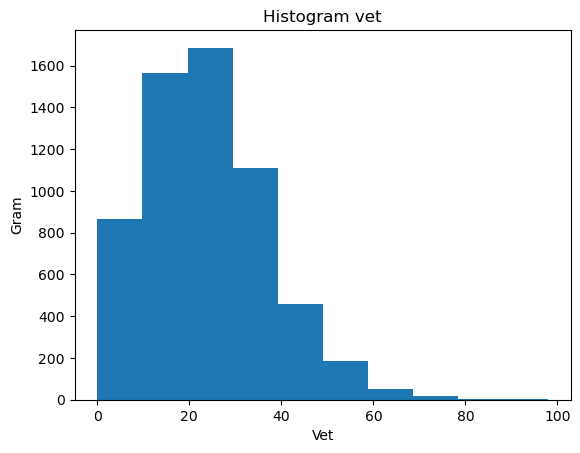

In [32]:
plt.hist(train_Dataset[["vet"]])
plt.title('Histogram vet')
plt.xlabel('Vet')
plt.ylabel('Gram')
plt.show()

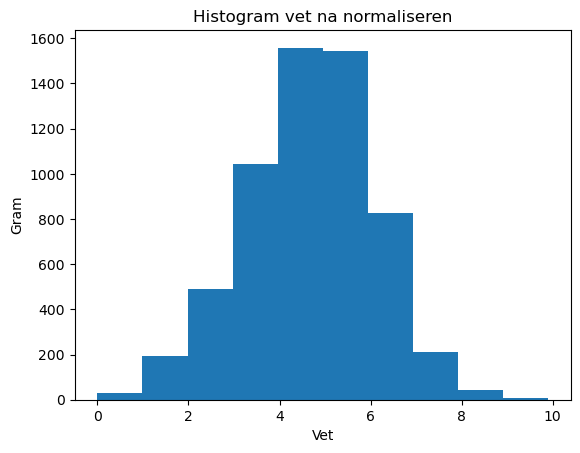

In [33]:
trans_vet = np.sqrt(train_Dataset[["vet"]])
plt.hist(trans_vet)
plt.title('Histogram vet na normaliseren')
plt.xlabel('Vet')
plt.ylabel('Gram')
plt.show()

# Datasets transformeren

In [16]:
# Dataset normaliseren
train_Dataset[["trans_vet"]] = np.sqrt(train_Dataset[["vet"]])
train_Dataset[["trans_energie"]] = np.sqrt(train_Dataset[["energie"]])
train_Dataset.head(3)

nutrition,vet,energie,trans_vet,trans_energie
recipe,,,,
Andijviestamppot met gebakken salami,41.0,630.0,6.403124,25.099801
Bietensoep met selderijroom,11.0,160.0,3.316625,12.649111
Libanese wraps met appel-koolsalade,18.0,440.0,4.242641,20.976177


In [17]:
test_Dataset[["trans_energie"]] = np.sqrt(test_Dataset[["energie"]])
test_Dataset.head(3)

nutrition,vet,energie,trans_energie
recipe,,,
Tompouce van kabeljauw,24.0,320.0,17.888544
Tong met gebruinde boter &amp; haricots verts,38.0,540.0,23.237900
Tonijn-broccoliquiche met tomaatjes en oude kaas,45.0,720.0,26.832816


# Model

In [18]:
X = train_Dataset[["trans_energie"]]
y = train_Dataset[["trans_vet"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(test_Dataset[['trans_energie']])
test_Dataset['y_pred_reg'] = y_pred**2
test_Dataset.head(3)

nutrition,vet,energie,trans_energie,y_pred_reg
recipe,,,,
Tompouce van kabeljauw,24.0,320.0,17.888544,15.491848
Tong met gebruinde boter &amp; haricots verts,38.0,540.0,23.237900,26.415279
Tonijn-broccoliquiche met tomaatjes en oude kaas,45.0,720.0,26.832816,35.383935


In [20]:
#model evalueren
reg_r2 = r2_score(test_Dataset['vet'], test_Dataset['y_pred_reg'])
reg_r2

0.6616711309546033

# Ridge

In [21]:
X = train_Dataset[["energie"]] 
y = train_Dataset[["vet"]]

In [22]:
clf = Ridge(alpha=1.0)

clf.fit(X, y)
y_pred = clf.predict(test_Dataset[["energie"]])
test_Dataset[["y_pred_ridge"]] = y_pred


In [23]:
test_Dataset.head(3)

nutrition,vet,energie,trans_energie,y_pred_reg,y_pred_ridge
recipe,,,,,
Tompouce van kabeljauw,24.0,320.0,17.888544,15.491848,15.952393
Tong met gebruinde boter &amp; haricots verts,38.0,540.0,23.237900,26.415279,27.119557
Tonijn-broccoliquiche met tomaatjes en oude kaas,45.0,720.0,26.832816,35.383935,36.256327


In [24]:
ridge_r2 = r2_score(test_Dataset['vet'], test_Dataset['y_pred_ridge'])
ridge_r2

0.6588242398434692

# vergelijk ridge met linreg

In [25]:
print(reg_r2, ridge_r2)

0.6616711309546033 0.6588242398434692
